# 1.3 Data Analysis

- Sentiment Analysis by Vader to obtain the neutral, positive and negative sentiment of comments for each page
- Basic Statistical Analysis to easily infer the data
- Graphical Anlysis

### Data Structure:
```
collated_data: {
|   [page_name_1]: {
|   |   comments: {
|   |   |   [post_id_1]: {
|   |   |   |   [comment_id_1]: {
|   |   |   |   |   'Commenter': -
|   |   |   |   |   'Comment': -
|   |   |   |   |   'Comment_User_Tagging: -
|   |   |   |   },
|   |   |   |   ...
|   |   |   },
|   |   |   [post_id_2]: {
|   |   |   |   ...
|   |   |   },
|   |   |   ...
|   |   },
|   |   posts: {
|   |   |   [post_id_1]: {
|   |   |   |   'Date': -
|   |   |   |   'Content': -
|   |   |   |   'Reactions': {
|   |   |   |   |   'Total_Count': -
|   |   |   |   |   'Likes': -
|   |   |   |   |   'Haha': -
|   |   |   |   |   'Love': -
|   |   |   |   |   'Wow': -
|   |   |   |   |   'Sigh': -
|   |   |   |   |   'Grr': -
|   |   |   |   },
|   |   |   |   'Url': -
|   |   |   },
|   |   |   [post_id_2]: {
|   |   |   |   ...
|   |   |   },
|   |   |   ...
|   |   }
|   },
|   [page_name_2]: {
|   |   ...
|   },
|   ...
}
```

In [1]:
# Declaration of FINAL Static variables
ROOT_DATA_FOLDER = './Data/' 

# Declaration of all pages
page_list = [
    'DollarsAndSense',
    'MortgageConsultancy',
    'Seedly',
    'WokeManSalary'
]

# Declaration of all pages data
collated_data = {
    'DollarsAndSense': {},
    'MortgageConsultancy': {},
    'Seedly': {},
    'WokeManSalary': {}
}

# Declaration of num -> str months hash
months_options = {
    '10': 'Oct',
    '9': 'Sept',
    '8': 'Aug',
    '7': 'Jul',
    '6': 'Jun',
    '5': 'May',
    '4': 'Apr',
}

# Declaration of str -> days hash
months_days_options = {
    'Apr': 30,
    'May': 31,
    'Jun': 30,
    'Jul': 31,
    'Aug': 31,
    'Sept': 30,
    'Oct': 31,
}

In [2]:
import csv
import traceback
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statistics import mean, median
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [3]:
def read_comments_file(filepath):
    data = {}
    
    with open(comments_filepath, mode='r', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')     
        
        # Get header row. Usually the top of the csv file
        headers = next(csv_reader)
        
        # Retreive index of the respective headers
        post_id_index = headers.index('Post_ID')
        commenter_index = headers.index('User')
        comment_index = headers.index('Comment')
        comment_id_index = headers.index('Comment_ID')
        comment_user_tagging_index = headers.index('User_Comment_Tagging')
        
        # Retrieve content
        for row in csv_reader:
            try:
                # Subsequent appearance of same post_id
                data[row[post_id_index]][row[comment_id_index]] = {
                    'Commenter': row[commenter_index],
                    'Comment': row[comment_index],
                    'Comment_User_Tagging': row[comment_user_tagging_index]
                }
            except:
                # First appearance os post_id
                data[row[post_id_index]] = {
                    row[comment_id_index]: {
                        'Commenter': row[commenter_index],
                        'Comment': row[comment_index],
                        'Comment_User_Tagging': row[comment_user_tagging_index]
                    }
                }
                
    return data
    
def read_posts_file(filepath):
    data = {}
    
    with open(posts_filepath, mode='r', encoding='ISO-8859-1') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',') 
        
        # Get header row. Usually the top of the csv file
        headers = next(csv_reader)
        
        # Retreive index of the respective headers
        post_id_index = headers.index('post_id')
        date_index = headers.index('date')
        content_index = headers.index('text')
        total_reactions_index = headers.index('reactions')
        likes_index = headers.index('likes')
        haha_index = headers.index('ahah')
        love_index = headers.index('love')
        wow_index = headers.index('wow')
        sigh_index = headers.index('sigh')
        grrr_index = headers.index('grrr')
        url_index = headers.index('url')
        count = 0
        # Retrieve contents
        for row in csv_reader:
            data[row[post_id_index]] = {
                'Date': row[date_index],
                'Content': row[content_index],
                'Reactions': {
                    'Total_Count': row[total_reactions_index],
                    'Likes': row[likes_index],
                    'Haha': row[haha_index],
                    'Love': row[love_index],
                    'Wow': row[wow_index],
                    'Sigh': row[sigh_index],
                    'Grrr': row[grrr_index]
                },              
                'Url': row[url_index]
            }
            
    return data

def fb_vader_sentiment_analysis(analyzer, comment_list):       
    neu_sentences = 0
    pos_sentences = 0
    neg_sentences = 0
 
    for line in comment_list:
        vs = analyzer.polarity_scores(line)

        if vs['compound'] > 0.15:
            pos_sentences += 1
        elif vs['compound'] < -0.15:
            neg_sentences += 1
        else:
            neu_sentences += 1

    neu_accuracy = neu_sentences / len(comment_list) * 100        
    pos_accuracy = pos_sentences / len(comment_list) * 100     
    neg_accuracy = neg_sentences / len(comment_list) * 100  
                
    return neu_accuracy, pos_accuracy, neg_accuracy

In [4]:
# Load all data into JSON format variable - collated_data
for page in page_list:
    comments_filepath = ROOT_DATA_FOLDER + page + '/' + page + '_collated_comments_tagging.txt'
    posts_filepath = ROOT_DATA_FOLDER + page + '/' + page + '_posts.txt'
    
    collated_data[page]['comments'] = read_comments_file(comments_filepath)
    collated_data[page]['posts'] = read_posts_file(posts_filepath)

## 1.3.1 Sentiment Analysis
- No. of Positive Comments
- No. of Neutral Comments
- No. of Negative Comments

In [5]:
analyzer = SentimentIntensityAnalyzer()

comments_count = []
postive_list = []
neutral_list = []
negative_list = []

for page in page_list:
    comment_list = []
    for post, comments in collated_data[page]['comments'].items():
        for comment_id, comment_content in comments.items():
            comment_list.append(comment_content['Comment'])
    
    neu, pos, neg = fb_vader_sentiment_analysis(analyzer, comment_list=comment_list)
    
    comments_count.append(len(comment_list))
    postive_list.append(pos)
    neutral_list.append(neu)
    negative_list.append(neg)

In [6]:
# Percentage of positive, neutral and negative comments for each page
df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Comments': comments_count,
        'Positive (%)': postive_list,
        'Neutral (%)': neutral_list,
        'Negative (%)': negative_list
    }
)
df.style

,Page Name,No. of Comments,Positive (%),Neutral (%),Negative (%)
0,DollarsAndSense,409,29.8289,67.4817,2.68949
1,MortgageConsultancy,28,53.5714,35.7143,10.7143
2,Seedly,577,58.4055,38.6482,2.94627
3,WokeManSalary,1803,43.0948,45.6461,11.259


In [7]:
# TO-DO ???
# Percentage of positive, neutral and negative posts for each page

## 1.3.2 Basic Statistical Analysis
- Minimum count
- Mean count
- Maximum count
- Median count
- Sum count

In [8]:
# Total number of posts for each page
post_count = [len(collated_data[page]['posts'].keys()) for page in page_list]

df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Posts': post_count
    }
)
df.style

,Page Name,No. of Posts
0,DollarsAndSense,300
1,MortgageConsultancy,229
2,Seedly,327
3,WokeManSalary,28


In [9]:
# Total number of comments for each page
comments_count = []

for page in page_list:
    count = 0
    for comments in collated_data[page]['comments'].values():
        count += len(comments)
    comments_count.append(count)
        
df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Comments': comments_count
    }
)
df.style

,Page Name,No. of Comments
0,DollarsAndSense,409
1,MortgageConsultancy,28
2,Seedly,577
3,WokeManSalary,1803


In [10]:
# Percentage of posts with comments
post_comments_count = [len(collated_data[page]['comments'].keys()) for page in page_list]

df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Posts': post_count,
        'No. of Posts w Comments': post_comments_count
    }
)
df['Posts w Comments (%)'] = df['No. of Posts w Comments'] / df['No. of Posts'] * 100
df.style

,Page Name,No. of Posts,No. of Posts w Comments,Posts w Comments (%)
0,DollarsAndSense,300,167,55.6667
1,MortgageConsultancy,229,21,9.17031
2,Seedly,327,300,91.7431
3,WokeManSalary,28,28,100


In [11]:
# Average number of comments per post (w comments)
df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Posts w Comments': post_comments_count,
        'No. of Comments': comments_count,
    }
)
df['Average No. of Comments per Post (w Comments)'] = df['No. of Comments'] / df['No. of Posts w Comments']
df.style

,Page Name,No. of Posts w Comments,No. of Comments,Average No. of Comments per Post (w Comments)
0,DollarsAndSense,167,409,2.4491
1,MortgageConsultancy,21,28,1.33333
2,Seedly,300,577,1.92333
3,WokeManSalary,28,1803,64.3929


In [12]:
# Identify minimum, maximum (and median) and total number of comments per page (only for posts w comments)
comments_count_list = []

for page in page_list:
    comments_count = []
    for post, comments in collated_data[page]['comments'].items():
        comments_count.append(len(comments))
    comments_count_list.append(comments_count)

df = pd.DataFrame(
    data = {
        'Page Name --> Comments': page_list,
        'Min': [min(comments_count) for comments_count in comments_count_list],
        'Max': [max(comments_count) for comments_count in comments_count_list],
        'Median': [median(comments_count) for comments_count in comments_count_list],
        'Sum': [sum(comments_count) for comments_count in comments_count_list]
    }
)
df.style

,Page Name --> Comments,Min,Max,Median,Sum
0,DollarsAndSense,1,44,1,409
1,MortgageConsultancy,1,3,1,28
2,Seedly,1,14,1,577
3,WokeManSalary,1,366,26,1803


In [13]:
# Average number of comments per post
df = pd.DataFrame(
    data = {
        'Page Name': page_list, 
        'No. of Posts': post_count,
        'No. of Comments': [sum(comments_count) for comments_count in comments_count_list],
    }
)
df['Average No. of Comments per Post'] = df['No. of Comments'] / df['No. of Posts']
df.style

,Page Name,No. of Posts,No. of Comments,Average No. of Comments per Post
0,DollarsAndSense,300,409,1.36333
1,MortgageConsultancy,229,28,0.122271
2,Seedly,327,577,1.76453
3,WokeManSalary,28,1803,64.3929


In [14]:
# Identify minimum, maximum (and median) and total number of comments per page (for all posts)
comments_count_list_all = []

for page in page_list:
    comments_count = []
    for post_id in collated_data[page]['posts'].keys():
        try:
            comments_count.append(len(collated_data[page]['comments'][post_id].values()))
        except:
            comments_count.append(0)
    comments_count_list_all.append(comments_count)    
    
df = pd.DataFrame(
    data = {
        'Page Name --> Comments': page_list,
        'Min': [min(comments_count) for comments_count in comments_count_list_all],
        'Max': [max(comments_count) for comments_count in comments_count_list_all],
        'Median': [median(comments_count) for comments_count in comments_count_list_all],
        'Sum': [sum(comments_count) for comments_count in comments_count_list_all]
    }
)
df.style

,Page Name --> Comments,Min,Max,Median,Sum
0,DollarsAndSense,0,44,1,409
1,MortgageConsultancy,0,3,0,28
2,Seedly,0,14,1,577
3,WokeManSalary,1,366,26,1803


In [15]:
# Percentage of user taggings in comments
user_taggings_count = []

for page in page_list:
    user_taggings = 0
    for post, comments in collated_data[page]['comments'].items():
        for comment_id, comment_content in comments.items():
            if comment_content['Comment_User_Tagging'] != '':
                user_taggings += 1
    user_taggings_count.append(user_taggings)
      
df = pd.DataFrame(
    data = {
        'Page Name ---> Comments': page_list, 
        'No. of Comments': [len(comments_count) for comments_count in comments_count_list],
        'w User Taggings': user_taggings_count
    }
)
df['User Taggings (%)'] = df['w User Taggings'] / df['No. of Comments'] * 100
df.style

,Page Name ---> Comments,No. of Comments,w User Taggings,User Taggings (%)
0,DollarsAndSense,167,240,143.713
1,MortgageConsultancy,21,0,0
2,Seedly,300,223,74.3333
3,WokeManSalary,28,1016,3628.57


In [16]:
# Identify the minimum, mean, maximum (and median) and total number of reactions per page
reactions_count_list = []

for page in page_list:
    reactions_count = []
    for post_id, post_content in collated_data[page]['posts'].items():
        reactions_count.append(int(post_content['Reactions']['Total_Count']))       
    reactions_count_list.append(reactions_count)
    
df = pd.DataFrame(
    data = {
        'Page Name --> Reactions': page_list,
        'Min': [min(reactions_count) for reactions_count in reactions_count_list],
        'Mean': [mean(reactions_count) for reactions_count in reactions_count_list],
        'Max': [max(reactions_count) for reactions_count in reactions_count_list],
        'Median': [median(reactions_count) for reactions_count in reactions_count_list],
        'Sum': [sum(reactions_count) for reactions_count in reactions_count_list]
    }
)
df.style

,Page Name --> Reactions,Min,Mean,Max,Median,Sum
0,DollarsAndSense,0,29.6967,734,13,8909
1,MortgageConsultancy,1,24.4454,66,23,5598
2,Seedly,0,15.6728,197,9,5125
3,WokeManSalary,72,2112.46,17011,601,59149


## 1.3.3 Graphical Analysis
- Sum count
- Average count

In [17]:
index = np.arange(len(months_options))
collated_posts_by_month = {}

for page in page_list:
    posts_by_month = {}
    
    for post_id, post_content in collated_data[page]['posts'].items():
        month = post_content['Date'].split()[0].split('/')[1]
        
        try:
            posts_by_month[months_options[month]].append(post_id)
        except:
            posts_by_month[months_options[month]] = []
    
    if 'WokeManSalary' in page:
        posts_by_month['Apr'] = []
        
    collated_posts_by_month[page] = posts_by_month

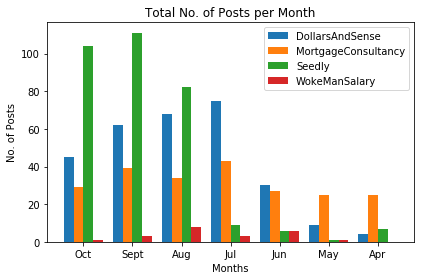

,Page Name ---> Months,Oct,Sept,Aug,Jul,Jun,May,Apr
0,DollarsAndSense,45,62,68,75,30,9,4
1,MortgageConsultancy,29,39,34,43,27,25,25
2,Seedly,104,111,82,9,6,1,7
3,WokeManSalary,1,3,8,3,6,1,0


In [18]:
# Total number of posts per month, per page
bar_width = 0.2
bar_pos = 0

ax = plt.subplot()

for page, posts_by_month in collated_posts_by_month.items():
    ax.bar(
        index + bar_pos, 
        [len(monthly_posts) for monthly_posts in posts_by_month.values()], 
        width=bar_width, 
        label=page, 
        align='center'
    )
    bar_pos += bar_width

plt.xlabel('Months')
plt.ylabel('No. of Posts')
plt.title('Total No. of Posts per Month')
plt.xticks(index + bar_width + 0.1, months_options.values())
plt.legend()
plt.tight_layout()
plt.show()

data = {'Page Name ---> Months': page_list}
for page, posts_by_month in collated_posts_by_month.items():
    for month_str, month_posts in posts_by_month.items():
        try:
            data[month_str].append(len(month_posts))
        except:
            data[month_str] = [len(month_posts)]
df = pd.DataFrame(data=data)
df.style

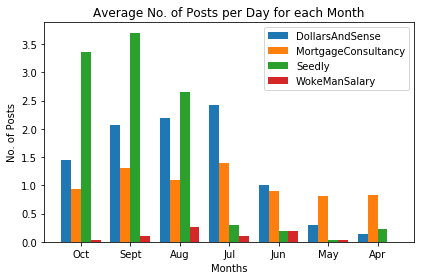

,Page Name ---> Months,Oct,Sept,Aug,Jul,Jun,May,Apr
0,DollarsAndSense,1.45161,2.06667,2.19355,2.41935,1,0.290323,0.133333
1,MortgageConsultancy,0.935484,1.3,1.09677,1.3871,0.9,0.806452,0.833333
2,Seedly,3.35484,3.7,2.64516,0.290323,0.2,0.0322581,0.233333
3,WokeManSalary,0.0322581,0.1,0.258065,0.0967742,0.2,0.0322581,0


In [19]:
# Average number of posts per day for each month, per page
bar_width = 0.2
bar_pos = 0

ax = plt.subplot()

for page, posts_by_month in collated_posts_by_month.items():
    ax.bar(
        index + bar_pos, 
        [len(monthly_posts)/months_days_options[month_str] for month_str, monthly_posts in posts_by_month.items()], 
        width=bar_width, 
        label=page, 
        align='center'
    )
    bar_pos += bar_width

plt.xlabel('Months')
plt.ylabel('No. of Posts')
plt.title('Average No. of Posts per Day for each Month')
plt.xticks(index + bar_width + 0.1, months_options.values())
plt.legend()
plt.tight_layout()
plt.show()

data = {'Page Name ---> Months': page_list}
for page, posts_by_month in collated_posts_by_month.items():
    for month_str, month_posts in posts_by_month.items():
        try:
            data[month_str].append(len(month_posts)/months_days_options[month_str])
        except:
            data[month_str] = [len(month_posts)/months_days_options[month_str]]
df = pd.DataFrame(data=data)
df.style